# **Loading Dataset**

First load the required HR dataset using pandas’ read CSV function. 
The dataset has 14999 rows and 10 columns 

In [ ]:
#https://machinelearninggeek.com/multi-layer-perceptron-neural-network-using-python/
import numpy as np
import pandas as pd
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
# Import accuracy score 
from sklearn.metrics import accuracy_score
#Importing LabelEncoder 
from sklearn import preprocessing
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

# Load data
data=pd.read_csv('sample_data/HR_comma_sep.csv')

data.shape
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# **Preprocessing: Label Encoding**

*   Many Machine learning algorithms process numerical input data.
*   Categorical columns need to be represented in a numerical column
*   To encode Categorical data, map each value to a number. 
>   **E.g.** Salary column’s value can be represented as 
>        low:0
>        medium:1
>        high:2

This process is known as **label encoding**. In sklearn, this is done using **LabelEncoder**

The preprocessing module is imported and the LabelEncoder object is created. The categorical **“salary”** and **“Departments“** column is transformed into the numeric column using the LabelEncoder object using **fit** and **transform** functions.


In [ ]:


# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['Encoded Salary']=le.fit_transform(data['salary'])
data['Dept']=le.fit_transform(data['sales'])
# Displaying to see the transformation 
print(data[['Encoded Salary','Dept']])
data.sales.unique()
pd.unique(data[['sales', 'Dept']].values.ravel('K'))

       Encoded Salary  Dept
0                   1     7
1                   2     7
2                   2     7
3                   1     7
4                   1     7
...               ...   ...
14994               1     8
14995               1     8
14996               1     8
14997               1     8
14998               1     8

[14999 rows x 2 columns]


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', 7, 2, 3, 9, 8, 4, 0, 6,
       5, 1], dtype=object)

# **Split the dataset**

**Aim:** To assess the model performance, the dataset needs to be split into train and test set. 

**Function Used:** Let’s split dataset by using function **train_test_split()**

There are 3 parameters 
>        features
>        target
>        test_set size


In [ ]:
# Spliting data into Features
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Dept', 'Encoded Salary']]

y=data['left']



# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% training and 30% test

# **Build the Classification Model**

**Aim:** Build an ***employee churn prediction model*** (predict if the employee will leave the organization or not) using **MLPClassifier.**

**Steps:**  
*   import the MLPClassifier module 
*   Create MLP Classifier object using MLPClassifier() function
*   Fit our model on the train set using fit()
*   Perform prediction on the test set using predict()

**Parameters**:
*   **hidden_layer_sizes:** it is a tuple where each element represents one layer and its value represents the number of neurons on each hidden layer.
*   **learning_rate_init:**It used to controls the step-size in updating the 
      weights. 
*   **random_state:**It defines the random number for weights and bias 
      initialization.
*   **verbose:**It used to print progress messages to standard output.
*   **activation:** Activation function for the hidden layer. 
      Examples, identity, logistic, tanh, and relu. 
      *By default,* **relu** is used as an activation function.

**Test for new data points and predict** 

In [ ]:


# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=False,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)
clf.loss_curve_
#X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
       # 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Dept', 'Encoded Salary']]
  
testX = [[0.37,0.32,2,188,3,0,0,7,0]]  #Employee will leave
#testX = [[0.77,0.72,2,159,3,0,0,2,2]]    #Employee will stay 
testpred=clf.predict(testX)
print("testpred is :", testpred)

if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")


testpred is : [1]
Employee will leave


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


# **Hand-coded Mini-Batch learning**

*   N_TRAIN_SAMPLES will be got from the # of rows in shape[0] of the dataset 
*   N_EPOCHS and N_BATCH are hard-coded for this programs as 12 and 128 respectively 
*   N_CLASSES will be [0,1] as this is the outcome to be predicted '0' measn employee will stay and '1' means employee will leave

**Mini Batch Training is done** 

*   To ensure random # of samples for mini-batch training **random.permutation** function is used
*   The training is done for  N_EPOCHS. Here it is 25 epochs. 

**Plots**
*   The Accuracy score for the train and test dataset is plotted 






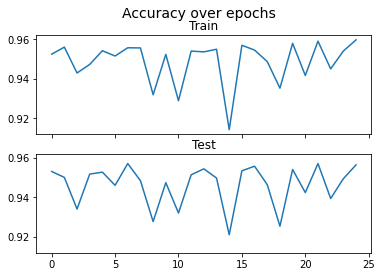

In [ ]:

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    #print('epoch: ', epoch)
    # SHUFFLING
    # Do randon permutation umtil the # of rows in dataset. Here it is 14,999
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0

    #Do mini-batch training until # of rows are reached 
    while True:
        # MINI-BATCH
        # Do for a random # of rows + fixed batch sixe 
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        # Fit the MLP Classifier 
        clf.partial_fit(X_train.iloc[indices], y_train.iloc[indices], classes=N_CLASSES)
        # Do for the rest after the previous mini-batch index 
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # ACCURACY SCORE FOR TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # ACCURACY SCORE FOR TEST
    scores_test.append(clf.score(X_test, y_test))

    epoch += 1

""" Plotting the Accuracy Score Over the 25 Epochs"""
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

# **Make Prediction and Evaluate the Model**

*   Predictions are made on the test dataset
*   Assess model accuracy based on available actual labels of the test dataset. 


In [ ]:


# Make prediction on train dataset
ypredtrain = clf.predict(X_train)

# Calcuate accuracy
print("Accuracy Score for Train Data is",accuracy_score(y_train,ypredtrain))

# Make prediction on test dataset
ypredtest=clf.predict(X_test)

# Calcuate accuracy
print("Accuracy Score for Test Data is", accuracy_score(y_test,ypredtest))


Accuracy Score for Train Data is 0.9595799649970831
Accuracy Score for Test Data is 0.9563333333333334


# **Model Measurement Analysis** 

*   Confusion Matrix 
*   Accuracy 
*   Precision 
*   Recall 

In [ ]:
from sklearn.metrics import confusion_matrix
conftrain=confusion_matrix(y_train,ypredtrain)
print("Train Confusion Matrix is\n", conftrain)
 

Train Confusion Matrix is
 [[8907  227]
 [ 258 2607]]


In [ ]:

conftest=confusion_matrix(y_test,ypredtest)
print("Test Confusion Matrix is\n", conftest)

Test Confusion Matrix is
 [[2243   51]
 [  80  626]]


In [ ]:

TN, FN, FP, TP = metrics.confusion_matrix(list(y_test), list(ypredtest), labels=[0, 1]).ravel() #0,1 is default label of sklearn

print("\n For Test Data")
print("\nTH",TN)
print("\nTP",TP)
print("\nFH",FN)
print("\nFP",FP)


 For Test Data

TH 2243

TP 626

FH 51

FP 80


In [ ]:
TN, FN, FP, TP = metrics.confusion_matrix(list(y_train), list(ypredtrain), labels=[0, 1]).ravel() #0,1 is default label of sklearn

print("\n For Train Data")
print("\nTH",TN)
print("\nTP",TP)
print("\nFH",FN)
print("\nFP",FP)


 For Train Data

TH 8907

TP 2607

FH 227

FP 258


In [ ]:
print("\n Test Precision is", metrics.precision_score(y_test, ypredtest))


 Test Precision is 0.9246676514032496


In [ ]:
print("\n Train Precision is", metrics.precision_score(y_train, ypredtrain))


 Train Precision is 0.9199011997177134


In [ ]:
print("\n Test Recall is", metrics.recall_score(y_test, ypredtest))


 Test Recall is 0.886685552407932


In [ ]:
print("\n Train Recall is", metrics.precision_score(y_train, ypredtrain))


 Train Recall is 0.9199011997177134


Text(0.5, 304.56945454545456, 'Predicted label')

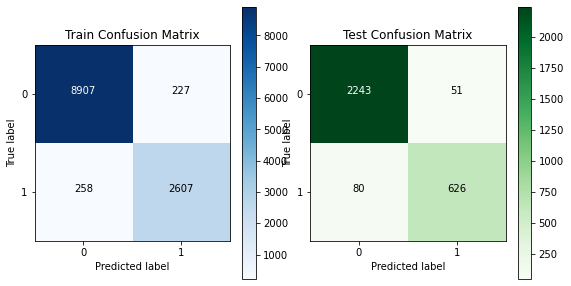

In [ ]:

classes = [0, 1]

# plot train  confusion matrix
myplt=plt.figure(figsize=(8,8))
ax1 = myplt.add_subplot(2,2,1)

plt.imshow(conftrain, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Train Confusion Matrix")
ax1=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conftrain.max() / 2.
for i, j in itertools.product(range(conftrain.shape[0]), range(conftrain.shape[1])):
    plt.text(j, i, format(conftrain[i, j], fmt),
             horizontalalignment="center",
             color="white" if conftrain[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# plot test confusion matrix
ax2 = myplt.add_subplot(2,2,2)

plt.imshow(conftest, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Test Confusion Matrix")
ax2=plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conftest.max() / 2.
for i, j in itertools.product(range(conftest.shape[0]), range(conftest.shape[1])):
    plt.text(j, i, format(conftest[i, j], fmt),
             horizontalalignment="center",
             color="white" if conftest[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')